## Part (a)

1. Sample v
2. Plot 3D
3. Effect of varying length scale on the GP surface

- Control the smoothness of the GP surface
- For small l, positions far from each other will apear to be uncorrelated, hence overall very randomized
-  For large l, they will all be strongly correlated and hence having better smoothness.


4. Visualise the prior sample with the data overlaid using plot result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *


###--- Data Generation ---###

### Inference grid defining {ui}i=1,Dx*Dy
Dx = 16
Dy = 16
N = Dx * Dy     # Total number of coordinates
points = [(x, y) for y in np.arange(Dx) for x in np.arange(Dy)]                # Indexes for the inference grid
coords = [(x, y) for y in np.linspace(0,1,Dy) for x in np.linspace(0,1,Dx)]    # Coordinates for the inference grid
xi, yi = np.array([c[0] for c in points]), np.array([c[1] for c in points])    # Get x, y index lists
x, y = np.array([c[0] for c in coords]), np.array([c[1] for c in coords])      # Get x, y coordinate lists

### Data grid defining {vi}i=1,N/subsample_factor - subsampled from inference grid
subsample_factor = 4
idx = subsample(N, subsample_factor) # guaranteed no repeats
M = len(idx)                                                                   # Total number of data points

### Generate K, the covariance of the Gaussian process, and sample from N(0,K) using a stable Cholesky decomposition
l = 0.3
K = GaussianKernel(coords, l)
z = np.random.randn(N, )
Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
u = Kc @ z

### Observation model: v = G(u) + e,   e~N(0,I)
G = get_G(N, idx)
v = G @ u + np.random.randn(M)

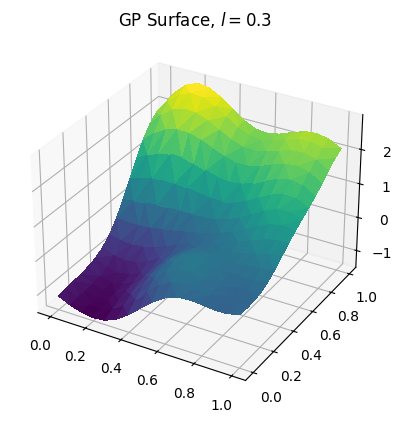

In [53]:
### Plotting examples
plot_3D(u, x, y, title=f'GP Surface, $l = {l}$')

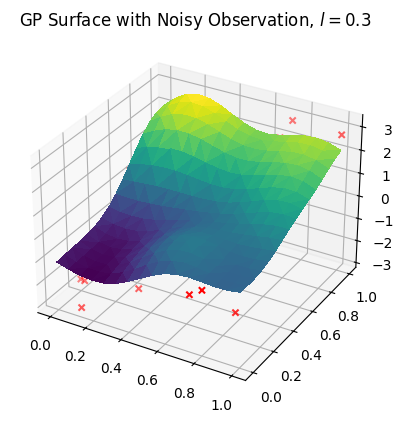

In [54]:
plot_result(u, v, x, y, x[idx], y[idx],title=f'GP Surface with Noisy Observation, $l={l}$')               # Plot original u with data v

## Part (b)

In [ ]:
Kc_inverse = np.linalg.inv(Kc)
K_inverse = Kc_inverse.T @ Kc_inverse # This is numerically stable
lp = log_prior(u, K_inverse)

In [30]:
lp

1085.6615933215608

In [31]:
lcl = log_continuous_likelihood(u, v, G)
lcl

-88.80288636564333